In [10]:
import pandas as pd
from pandas import read_csv
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt


df = read_csv('Clean_Dataset.csv')
df = df.drop(columns=['Unnamed: 0'])

In [11]:
# Initialize the LabelEncoder object
label_encoder = LabelEncoder()

# Encoding categorical features to numeric format if the column type is 'object'
for column in df.columns:
    if df[column].dtype == 'object':  # Check if the column is categorical
        df[column] = label_encoder.fit_transform(df[column])

# Separating the independent variables (X) and dependent variable (y)
X = df.drop(['price'], axis=1)  # Features
Y = df['price']  # Target variable

In [12]:
df.head(10)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955
5,5,1541,2,4,2,0,5,1,2.33,1,5955
6,5,1533,2,4,2,4,5,1,2.08,1,6060
7,5,1543,2,0,2,2,5,1,2.17,1,6060
8,2,1013,2,1,2,4,5,1,2.17,1,5954
9,2,1014,2,0,2,2,5,1,2.25,1,5954


In [13]:
# Splitting the dataset into 70% training and 30% testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

# Displaying the shape of training and testing datasets
print(f"Training Features Shape: {X_train.shape}, Testing Features Shape: {X_test.shape}")
print(f"Training Labels Shape: {Y_train.shape}, Testing Labels Shape: {Y_test.shape}")

# Initialize the MinMaxScaler to scale features between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler on the training set and apply the same transformation to the testing set
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled numpy arrays back to DataFrames for easier handling
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)


Training Features Shape: (210107, 10), Testing Features Shape: (90046, 10)
Training Labels Shape: (210107,), Testing Labels Shape: (90046,)


In [14]:
# Function to calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(actual_values, predicted_values):
    actual_values, predicted_values = np.array(actual_values), np.array(predicted_values)
    return np.mean(np.abs((actual_values - predicted_values) / actual_values)) * 100

In [21]:
# Import necessary libraries for regression models and evaluation metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize regression model objects with default settings
linear_reg = LinearRegression()  # Linear Regression model
decision_tree = DecisionTreeRegressor()  # Decision Tree Regressor model
bagging_reg = BaggingRegressor()  # Bagging Regressor model
random_forest = RandomForestRegressor()  # Random Forest Regressor model
support_vector = SVR()  # Support Vector Regressor model
xgboost_reg = xgb.XGBRegressor(tree_method='hist')  # XGBoost Regressor model
k_neighbors = KNeighborsRegressor(n_neighbors=5)  # K-Nearest Neighbors Regressor model
extra_trees = ExtraTreesRegressor()  # Extra Trees Regressor model

# List of all the regression models to iterate through
model_list = [linear_reg, decision_tree, random_forest, k_neighbors, extra_trees, xgboost_reg, bagging_reg]

# Empty list to store the results of each model
results_list = []

# Loop through each model for training, prediction, and evaluation
for reg_model in model_list:
    
    # Train the model with the training dataset
    reg_model.fit(X_train, Y_train)

    # Make predictions using the testing dataset
    predictions = reg_model.predict(X_test)
    
    # Display the current model's name
    model_name = reg_model.__class__.__name__
    print(f"Training model: {model_name}")

    # Calculate and print evaluation metrics for each model
    mae = mean_absolute_error(Y_test, predictions)  # Mean Absolute Error
    mse = mean_squared_error(Y_test, predictions)  # Mean Squared Error
    rmse = np.sqrt(mse)  # Root Mean Squared Error
    r2 = r2_score(Y_test, predictions)  # R-Squared Score
    rmsle = np.log(np.sqrt(mse))  # Root Mean Squared Logarithmic Error
    mape = calculate_mape(Y_test, predictions)  # Mean Absolute Percentage Error
        
    # Output the calculated metrics
    print(f'MAE: {round(mae, 3)}')
    print(f'MSE: {round(mse, 3)}')
    print(f'RMSE: {round(rmse, 3)}')
    print(f'R2 Score: {round(r2, 6)}')
    print(f'RMSLE: {round(rmsle, 3)}')
    print(f'MAPE: {round(mape, 2)}%')

    # Adjusted R-squared calculation to account for the number of features
    adjusted_r2 = 1 - (1 - r2) * (len(Y_test) - 1) / (len(Y_test) - X_test.shape[1] - 1)
    print(f'Adjusted R2 Score: {round(adjusted_r2, 6)}')
    
    # Divider for clarity between models
    print('--------------------------------------------------')
    print('')
    
        # Append the results to the list
    results_list.append({
        'Model': model_name,
        'MAE': round(mae, 3),
        'MSE': round(mse, 3),
        'RMSE': round(rmse, 3),
        'R2 Score': round(r2, 6),
        'RMSLE': round(rmsle, 3),
        'Adjusted R2 Score': round(adjusted_r2, 6)
    })

results = pd.DataFrame(results_list)


Training model: LinearRegression
MAE: 4623.409
MSE: 49062056.15
RMSE: 7004.431
R2 Score: 0.904672
RMSLE: 8.854
MAPE: 43.66%
Adjusted R2 Score: 0.904662
--------------------------------------------------

Training model: DecisionTreeRegressor
MAE: 909.355
MSE: 8837164.079
RMSE: 2972.737
R2 Score: 0.982829
RMSLE: 7.997
MAPE: 6.22%
Adjusted R2 Score: 0.982827
--------------------------------------------------

Training model: RandomForestRegressor
MAE: 895.42
MSE: 5669810.144
RMSE: 2381.136
R2 Score: 0.988984
RMSLE: 7.775
MAPE: 6.02%
Adjusted R2 Score: 0.988982
--------------------------------------------------

Training model: KNeighborsRegressor
MAE: 12274.681
MSE: 288415712.639
RMSE: 16982.806
R2 Score: 0.439607
RMSLE: 9.74
MAPE: 114.42%
Adjusted R2 Score: 0.439544
--------------------------------------------------

Training model: ExtraTreesRegressor
MAE: 943.536
MSE: 6514535.755
RMSE: 2552.359
R2 Score: 0.987342
RMSLE: 7.845
MAPE: 6.42%
Adjusted R2 Score: 0.987341
-------------------

In [28]:
results.head(10)

,Model,MAE,MSE,RMSE,R2 Score,RMSLE,Adjusted R2 Score
0,LinearRegression,4623.409,4.906206e+07,7004.431,0.904672,8.854,0.904662
1,DecisionTreeRegressor,909.355,8.837164e+06,2972.737,0.982829,7.997,0.982827
2,RandomForestRegressor,895.420,5.669810e+06,2381.136,0.988984,7.775,0.988982
3,KNeighborsRegressor,12274.681,2.884157e+08,16982.806,0.439607,9.740,0.439544
4,ExtraTreesRegressor,943.536,6.514536e+06,2552.359,0.987342,7.845,0.987341
5,XGBRegressor,1684.303,9.118745e+06,3019.726,0.982282,8.013,0.982280
6,BaggingRegressor,919.755,6.106051e+06,2471.042,0.988136,7.812,0.988135


In [23]:
# Train the Extra Trees model with the training dataset
extra_trees.fit(X_train, Y_train)

# Predicting on the test dataset
predicted_values = extra_trees.predict(X_test)

# Creating a DataFrame to store actual and predicted values side by side
output_df = pd.DataFrame({'Actual_Price': Y_test, 'Predicted_Price': predicted_values})

# Merging the actual DataFrame with the newly created output DataFrame
result_merged = df.merge(output_df, left_index=True, right_index=True)

# Display a sample of 10 rows from the result DataFrame
result_merged[['Actual_Price', 'Predicted_Price']].sample(10)

,Actual_Price,Predicted_Price
273181,55502,55502.00
218071,65529,65529.00
296077,84464,82000.74
286221,58282,51707.00
144265,4589,4344.85
250181,69244,72084.32
157576,5656,5656.00
88177,4294,4328.10
217243,57405,57405.00
111622,1714,1733.83


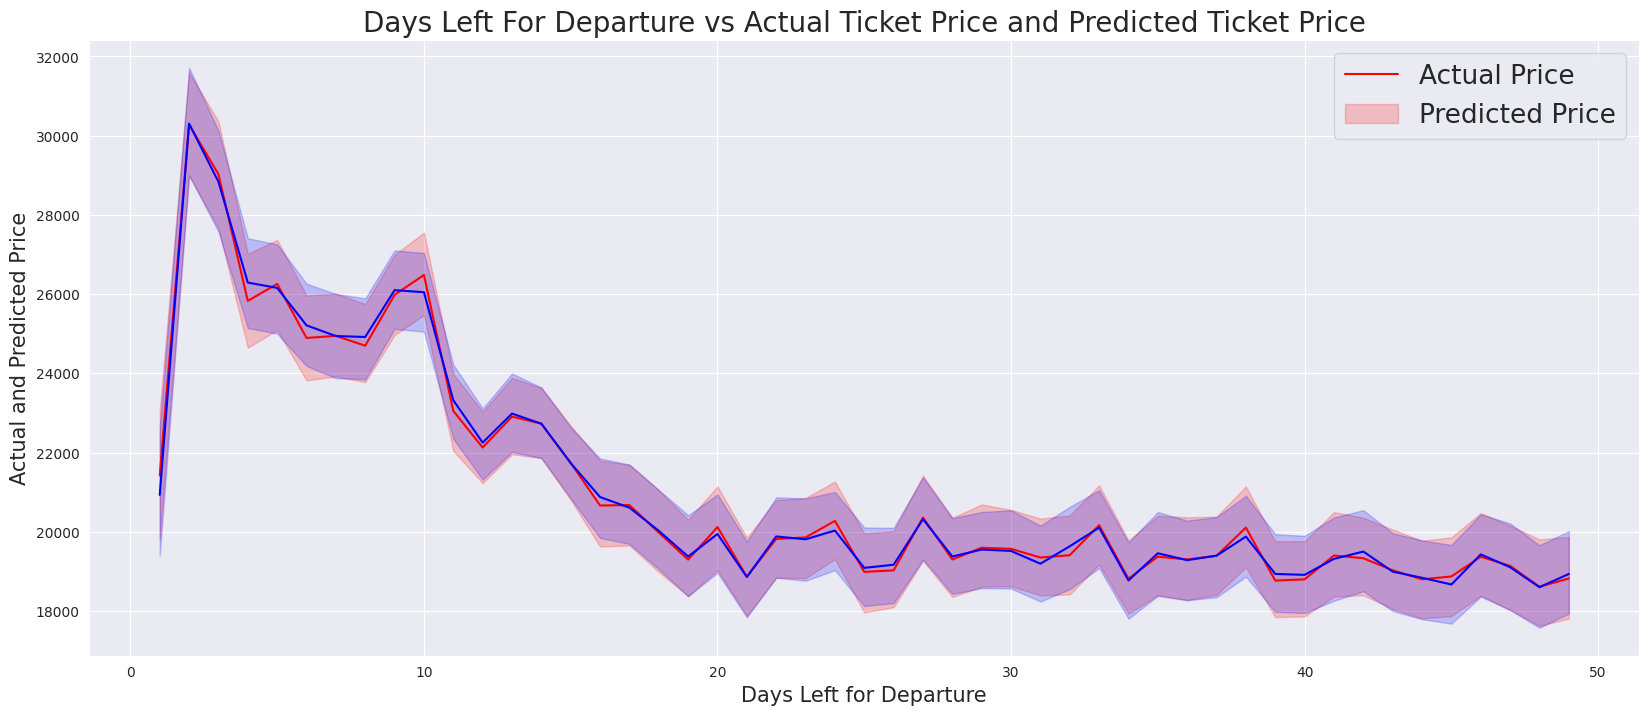

In [24]:
# Plot the comparison between actual and predicted prices over 'days_left'
plt.figure(figsize=(20, 8))

# Plotting the actual prices in red
sns.lineplot(data=result_merged, x='days_left', y='Actual_Price', color='red')

# Plotting the predicted prices in blue
sns.lineplot(data=result_merged, x='days_left', y='Predicted_Price', color='blue')

# Adding titles and labels to the plot
plt.title('Days Left For Departure vs Actual Ticket Price and Predicted Ticket Price', fontsize=20)
plt.legend(labels=['Actual Price', 'Predicted Price'], fontsize=19)
plt.xlabel('Days Left for Departure', fontsize=15)
plt.ylabel('Actual and Predicted Price', fontsize=15)
plt.show()

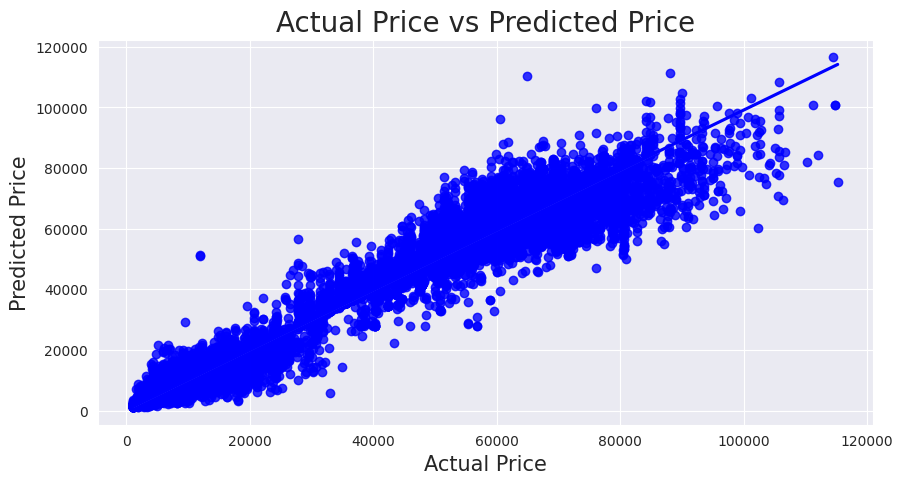

In [25]:
# Scatter plot for actual vs predicted price
plt.figure(figsize=(10, 5))

# Creating a regression plot to visualize correlation between actual and predicted prices
sns.regplot(x='Actual_Price', y='Predicted_Price', data=result_merged, color='blue')

# Adding titles and labels to the plot
plt.title('Actual Price vs Predicted Price', fontsize=20)
plt.xlabel('Actual Price', fontsize=15)
plt.ylabel('Predicted Price', fontsize=15)
plt.show()

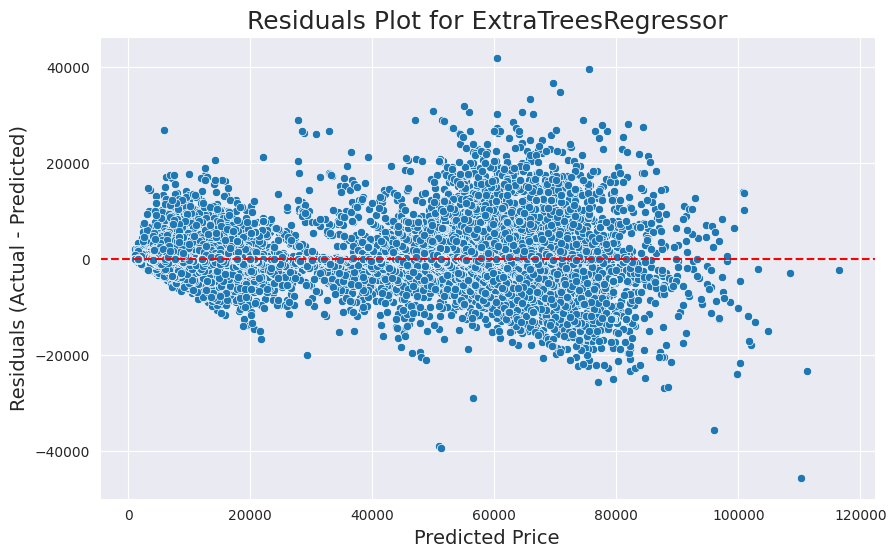

In [31]:

# Residual plot for a specific model
def plot_residuals(actual, predicted, model_name):
    residuals = actual - predicted
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=predicted, y=residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'Residuals Plot for {model_name}', fontsize=18)
    plt.xlabel('Predicted Price', fontsize=14)
    plt.ylabel('Residuals (Actual - Predicted)', fontsize=14)
    plt.grid(True)
    plt.show()

# Example usage for a model's residual plot
plot_residuals(result_merged['Actual_Price'], result_merged['Predicted_Price'], f'{extra_trees.__class__.__name__}')
